<a href="https://colab.research.google.com/github/buabaj/AI-Data_mining/blob/main/AI_Data_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question #1.1: (3 points)
check the bottom 10 rows of data frame "df".

In [ ]:
print("The last 10 rows of the dataframe")
df.tail(10)

The last 10 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3034,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3042,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,188.8,67.2,56.2,3045,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Question #1.2: (2 points)
Find the name of the columns of the dataframe

In [ ]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [ ]:
df.to_csv("automobile.csv", index=False)

Question #1.3: (5 points) Apply the method ".describe()" to the columns 'length' and 'compression-ratio'.

In [ ]:
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


Question #2.1: (5 points)
According to the example above, replace NaN in "stroke" column by mean.

In [ ]:
stroke_mean = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan, stroke_mean, inplace=True)

Question #2.2: (5 points)
According to the example above, transform mpg to L/100km in the column of
"highway-mpg", and change the name of column to "highway-L/100km".

In [ ]:
df['highway-L/100km'] = 235/df["highway-mpg"]

Question #2.3: (3 points)
According to the example above, normalize the column "height".

In [ ]:
df['height'] = df['height']/df['height'].max()

Question #2.4: (3 points)
As above, create indicator variable to the column of "aspiration": "std" to 1, while
"turbo" to 0. Change the column names for clarity.

In [ ]:
indicator = pd.get_dummies(df['aspiration'])
indicator.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [ ]:
indicator.rename(columns={'std':'dummy_1', 'turbo':'dummy_0'},
inplace=True)
indicator.head()

,dummy_1,dummy_0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Question #2.5: (4 points)
Merge the new dataframe to the original dataframe then drop the column
'aspiration'

In [ ]:
df = pd.concat([df, indicator], axis=1)

df.drop("aspiration", axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway-L/100km,horsepower-binned,diesel,gas,dummy_1,dummy_0
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,10.681818,Low,0,1,1,0


In [ ]:
df.to_csv('clean_df.csv')

Question #3.1:(2 points)
What is the data type of the column "peak-rpm"?

In [ ]:
print(df['peak-rpm'].dtype)


int64


Question #3.2: (3 points)
Find the correlation between the following columns: bore, stroke, compression-ratio,
and horsepower.

In [ ]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.067191,0.006942,0.576398
stroke,-0.067191,1.000000,0.197803,0.090170
compression-ratio,0.006942,0.197803,1.000000,-0.205874
horsepower,0.576398,0.090170,-0.205874,1.000000


Question 3.3 a): (5 points)
Find the correlation between x="stroke", y="price".

In [ ]:
df[["stroke","price"]].corr()

,stroke,price
stroke,1.000000,0.093688
price,0.093688,1.000000


Question 3.3 b):(5 points)
Given the correlation results between "price" and "stroke" do you expect a linear
relationship?
Verify your results using the function "regplot()".

ANS: based on the results in the above correlation, i do expect a linear relationship and expect the regression line to be close to the horizontal

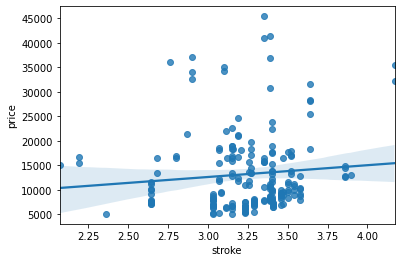

In [ ]:
sns.regplot(x="stroke", y="price", data=df)

Question 3.4:(5 points)
Use the "groupby" function to find the average "price" of each car based on "body-style"?

In [ ]:
df_bodyStyle_Price = df[['body-style','price']]
grouped = df_bodyStyle_Price.groupby(['body-style'],as_index=False).mean()
grouped

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9958.373134
3,sedan,14459.755319
4,wagon,12500.166667
